# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **IBRD Credit Scorecard Predictive Engine** |

# II. Notebook Target Definition

This notebook describes the Feature Engineering phase of IBRD Credit Scorecard Predictive Engine Project. Here, we take the cleaned and preprocessed loan data and create new features that can enhance our model's predictive power. By applying techniques such as binning, polynomial feature creation, and interaction term generation, we unlock further insights and potentially improve our model's performance. This step readies our data for the next phase of model building and validation.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from optbinning import BinningProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

(CVXPY) Jun 21 03:08:55 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 21 03:08:55 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


## III.B. Import Data

In [2]:
X_train = pd.read_pickle('../../data/processed/X_train.pkl')
X_test = pd.read_pickle('../../data/processed/X_test.pkl')
y_train = pd.read_pickle('../../data/processed/y_train.pkl')
y_test = pd.read_pickle('../../data/processed/y_test.pkl')

In [3]:
X_train.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
2153,2023-04-30,IBRD18870,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,IN,India,NPL,Fully Repaid,P009768,FARRAKA THERMAL,2.500000e+07,1985-10-01,2000-04-01,1980-07-11,1980-06-26,1980-12-10,1989-06-30,1990-02-01
5370,2023-04-30,IBRD39120,LATIN AMERICA AND CARIBBEAN,MX,Mexico,"NACIONAL FINANCIERA, S.N.C. NAFIN",MX,Mexico,SCL,Fully Repaid,P040462,ESSENTIAL SOCIAL SER,5.000000e+08,1999-04-15,2010-10-15,1995-06-23,1995-06-22,1995-07-06,1998-06-30,1998-07-02
6537,2023-04-30,IBRD70690,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,MINISTERE DES FINANCES,DZ,Algeria,FSL,Fully Repaid,P054217,DZ-FINANCIAL SYSTEM INFRASTR. MODERN.,1.650000e+07,2007-04-15,2017-10-15,2002-01-04,2001-07-26,2002-09-03,2006-06-30,2006-10-11
1014,2023-04-30,IBRD09570,EUROPE AND CENTRAL ASIA,TR,Turkiye,Ministry of Treasury and Finance,TR,Turkiye,NPL,Fully Repaid,P008906,ANTALYA FORESTRY&PAPER M,4.000000e+07,1979-05-01,1989-11-01,1974-01-28,1974-01-15,1976-05-26,1982-06-30,NaT
4831,2023-04-30,IBRD36330,LATIN AMERICA AND CARIBBEAN,BR,Brazil,Ministério da Fazenda,BR,Brazil,CPL,Fully Repaid,P006547,RIO DE JANEIRO METROPOLITAN TRANSPORT,8.102367e+07,1999-03-01,2008-09-01,1993-10-14,1993-06-29,1994-03-14,2000-12-31,2000-12-29


In [4]:
X_test.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
7270,2023-04-30,IBRD78320,LATIN AMERICA AND CARIBBEAN,PE,Peru,Ministerio De Economia Y Finanzas,PE,Peru,FSL,Terminated,P116929,PE Safe and Sustainable Transport,150000000.0,2018-07-15,2031-01-15,NaT,2010-01-14,NaT,2014-07-01,NaT
2085,2023-04-30,IBRD18320,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,CL,Chile,NPL,Fully Repaid,P006602,W/S PROJECT,38000000.0,1984-01-01,1995-07-01,1980-08-15,1980-04-17,1980-11-07,1987-06-30,1988-01-08
6585,2023-04-30,IBRD71170,MIDDLE EAST AND NORTH AFRICA,LB,Lebanon,MINISTRY OF FINANCE,LB,Lebanon,FSL,Fully Repaid,P074042,LB - Ba'albeck Water and Wastewater,43530000.0,2009-11-15,2015-05-15,2002-09-26,2002-06-04,2003-07-31,2012-06-15,2013-05-30
6515,2023-04-30,IBRD70470,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,MINISTERE DES FINANCES,DZ,Algeria,FSL,Fully Repaid,P064921,DZ-Budget System Modernization,23700000.0,2013-04-15,2016-10-15,2001-04-18,2001-02-06,2001-07-17,2009-02-28,2010-10-15
14,2023-04-30,IBRD00112,LATIN AMERICA AND CARIBBEAN,BR,Brazil,Ministério da Fazenda,BR,Brazil,NPL,Fully Repaid,P006214,POWER AND TELEPHONE,15000000.0,1955-07-01,1976-01-01,1951-01-18,1951-01-16,1951-04-10,1954-12-31,NaT


In [5]:
y_train.head()

2153    0
5370    0
6537    0
1014    0
4831    0
Name: bad, dtype: int32

In [6]:
y_test.head()

7270    1
2085    0
6585    0
6515    0
14      0
Name: bad, dtype: int32

# IV. Feature Engineering

## IV.A. Data Shape Inspection

In [7]:
X_train.shape, X_test.shape

((4680, 20), (2006, 20))

In [8]:
y_train.shape, y_test.shape

((4680,), (2006,))

## IV.B. Data Information Inspection

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4680 entries, 2153 to 6611
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 4680 non-null   datetime64[ns]
 1   Loan Number                   4680 non-null   object        
 2   Region                        4680 non-null   object        
 3   Country Code                  4679 non-null   object        
 4   Country                       4680 non-null   object        
 5   Borrower                      4642 non-null   object        
 6   Guarantor Country Code        4490 non-null   object        
 7   Guarantor                     4491 non-null   object        
 8   Loan Type                     4680 non-null   object        
 9   Loan Status                   4680 non-null   object        
 10  Project ID                    4680 non-null   object        
 11  Project Name                  46

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 7270 to 175
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 2006 non-null   datetime64[ns]
 1   Loan Number                   2006 non-null   object        
 2   Region                        2006 non-null   object        
 3   Country Code                  2005 non-null   object        
 4   Country                       2006 non-null   object        
 5   Borrower                      1987 non-null   object        
 6   Guarantor Country Code        1917 non-null   object        
 7   Guarantor                     1918 non-null   object        
 8   Loan Type                     2006 non-null   object        
 9   Loan Status                   2006 non-null   object        
 10  Project ID                    2006 non-null   object        
 11  Project Name                  200

In [11]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4680 entries, 2153 to 6611
Series name: bad
Non-Null Count  Dtype
--------------  -----
4680 non-null   int32
dtypes: int32(1)
memory usage: 54.8 KB


In [12]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2006 entries, 7270 to 175
Series name: bad
Non-Null Count  Dtype
--------------  -----
2006 non-null   int32
dtypes: int32(1)
memory usage: 23.5 KB


## IV.C. Unused Feature Removal

In [13]:
def unused_feat_removal(df, feature_to_remove):
    df.drop(columns = feature_to_remove, inplace = True)
    return df

In [14]:
feature_to_remove = ["End of Period", "Loan Number", "Country Code", "Borrower", "Guarantor Country Code", "Loan Status", "Project ID", "Project Name", "First Repayment Date", "Last Repayment Date", "Agreement Signing Date", "Board Approval Date",
                     "Effective Date (Most Recent)", "Closed Date (Most Recent)", "Last Disbursement Date"]

In [15]:
unused_feat_removal(X_train, feature_to_remove)
unused_feat_removal(X_test, feature_to_remove)
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [16]:
X_train.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [17]:
X_test.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
7270,LATIN AMERICA AND CARIBBEAN,Peru,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,Lebanon,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,NPL,15000000.0


## IV.D. Feature Renaming

In [18]:
def feature_rename(df, rename_dict):
    return df.rename(columns = rename_dict)

In [19]:
rename_dict = {"Region": "region",
               "Country": "country",
               "Borrower": "borrower",
               "Guarantor": "guarantor",
               "Loan Type": "loan_type",
               "Original Principal Amount": "principal_amount"}

In [20]:
X_train = feature_rename(X_train, rename_dict)
X_test = feature_rename(X_test, rename_dict)
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [21]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [22]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
7270,LATIN AMERICA AND CARIBBEAN,Peru,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,Lebanon,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,NPL,15000000.0


## IV.E. Final Feature Inspection

In [23]:
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [24]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [25]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
7270,LATIN AMERICA AND CARIBBEAN,Peru,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,Lebanon,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,NPL,15000000.0


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4680 entries, 2153 to 6611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            4680 non-null   object 
 1   country           4680 non-null   object 
 2   guarantor         4491 non-null   object 
 3   loan_type         4680 non-null   object 
 4   principal_amount  4680 non-null   float64
dtypes: float64(1), object(4)
memory usage: 219.4+ KB


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 7270 to 175
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            2006 non-null   object 
 1   country           2006 non-null   object 
 2   guarantor         1918 non-null   object 
 3   loan_type         2006 non-null   object 
 4   principal_amount  2006 non-null   float64
dtypes: float64(1), object(4)
memory usage: 94.0+ KB


# V. Feature Selection

In [ ]:
feature = list(X_train.columns)
categorical_feature = ["region", "country", "guarantor", "loan_type"]
X = X_train[feature]
y = y_train.values
selection_criteria = {
    "iv": {
        "min": 0.02,
        "max": 0.5,
        "strategy": "highest"
    }
}

In [ ]:
optimal_binning_process = BinningProcess(feature, categorical_variables = categorical_feature, selection_criteria = selection_criteria)
optimal_binning_process.fit(X, y)

In [ ]:
optimal_binning_process.information(print_level = 2)

In [ ]:
optimal_binning_process.summary()

In [ ]:
optb = optimal_binning_process.get_binned_variable("country")
optimal_binning_table_column_name = optb.binning_table.build()
optimal_binning_table_column_name.insert(0, "Variables", "feature_column_name")
optb.binning_table.build()

In [ ]:
optb.binning_table.plot(metric = "event_rate")

In [ ]:
tod = optimal_binning_table_column_name.Bin.to_list()

In [ ]:
tod

## V.A. Feature Binning

### V.A.1. Feature Weight of Evidence and Information Value Inspection

In [28]:
def woe_analysis(X, feature, y):
    df = pd.concat([X[feature], y], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns[0], "n_observation", "proportion_of_category"]
    df["proportion_of_observation"] = df["n_observation"] / df["n_observation"].sum()
    df["n_good"] = df["proportion_of_category"] * df["n_observation"]
    df["n_bad"] = (1 - df["proportion_of_category"]) * df["n_observation"]
    df["proportion_of_good"] = df["n_good"] / df["n_good"].sum()
    df["proportion_of_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["proportion_of_good"] / df["proportion_of_bad"])
    df = df.sort_values(["WoE"]).reset_index(drop = True)
    df["diff_proportion_of_category"] = df["proportion_of_category"].diff().abs()
    df["diff_WoE"] = df["WoE"].diff().abs()
    df["IV"] = (df["proportion_of_good"] - df["proportion_of_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

def plot_by_woe(woe_df, rotation_of_x_axis_labels = 0):
    x = np.array(woe_df.iloc[:, 0].astype(str))
    y = woe_df["WoE"]
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(woe_df.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title("Weight of Evidence by " + woe_df.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

#### V.A.1.A. Region

In [29]:
region_woe = woe_analysis(X_train, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,WESTERN AND CENTRAL AFRICA,252,0.011905,0.053846,3.0,249.0,0.014151,0.055730,-1.370731,NaN,NaN,0.170192
1,EAST ASIA AND PACIFIC,1015,0.027586,0.216880,28.0,987.0,0.132075,0.220904,-0.514356,0.015681,0.856375,0.170192
2,EASTERN AND SOUTHERN AFRICA,209,0.033493,0.044658,7.0,202.0,0.033019,0.045210,-0.314248,0.005907,0.200108,0.170192
3,MIDDLE EAST AND NORTH AFRICA,553,0.045208,0.118162,25.0,528.0,0.117925,0.118174,-0.002111,0.011715,0.312137,0.170192
4,LATIN AMERICA AND CARIBBEAN,1530,0.049020,0.326923,75.0,1455.0,0.353774,0.325649,0.082837,0.003812,0.084947,0.170192
5,EUROPE AND CENTRAL ASIA,878,0.058087,0.187607,51.0,827.0,0.240566,0.185094,0.262131,0.009067,0.179294,0.170192
6,SOUTH ASIA,243,0.094650,0.051923,23.0,220.0,0.108491,0.049239,0.789977,0.036564,0.527846,0.170192


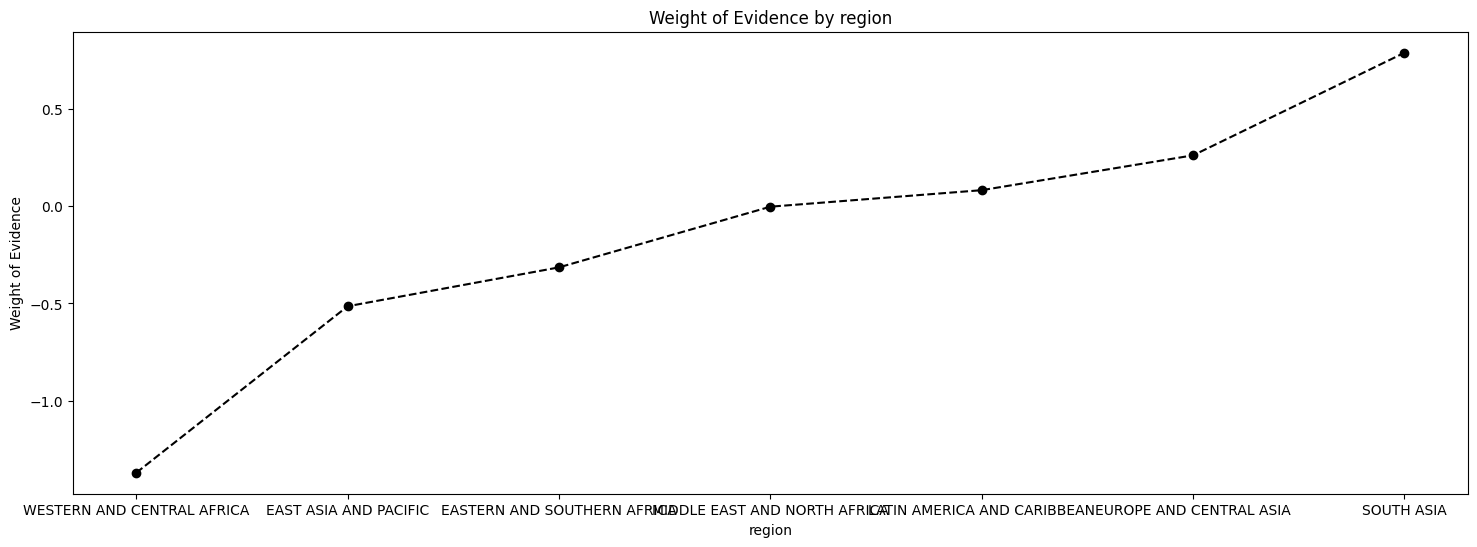

In [30]:
plot_by_woe(region_woe)

In [31]:
def regions_binning(df):
    regions_bin = {"EAST ASIA AND PACIFIC": "EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA",
                   "EASTERN AND SOUTHERN AFRICA": "EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA"}
    df["region"] = df["region"].replace(regions_bin)
    return df

In [32]:
X_train = regions_binning(X_train)
X_test = regions_binning(X_test)
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [33]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [34]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
7270,LATIN AMERICA AND CARIBBEAN,Peru,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,Lebanon,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,NPL,15000000.0


In [35]:
region_woe = woe_analysis(X_train, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,WESTERN AND CENTRAL AFRICA,252,0.011905,0.053846,3.0,249.0,0.014151,0.055730,-1.370731,NaN,NaN,0.1689
1,EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN A...,1224,0.028595,0.261538,35.0,1189.0,0.165094,0.266115,-0.477410,0.016690,0.893321,0.1689
2,MIDDLE EAST AND NORTH AFRICA,553,0.045208,0.118162,25.0,528.0,0.117925,0.118174,-0.002111,0.016613,0.475299,0.1689
3,LATIN AMERICA AND CARIBBEAN,1530,0.049020,0.326923,75.0,1455.0,0.353774,0.325649,0.082837,0.003812,0.084947,0.1689
4,EUROPE AND CENTRAL ASIA,878,0.058087,0.187607,51.0,827.0,0.240566,0.185094,0.262131,0.009067,0.179294,0.1689
5,SOUTH ASIA,243,0.094650,0.051923,23.0,220.0,0.108491,0.049239,0.789977,0.036564,0.527846,0.1689


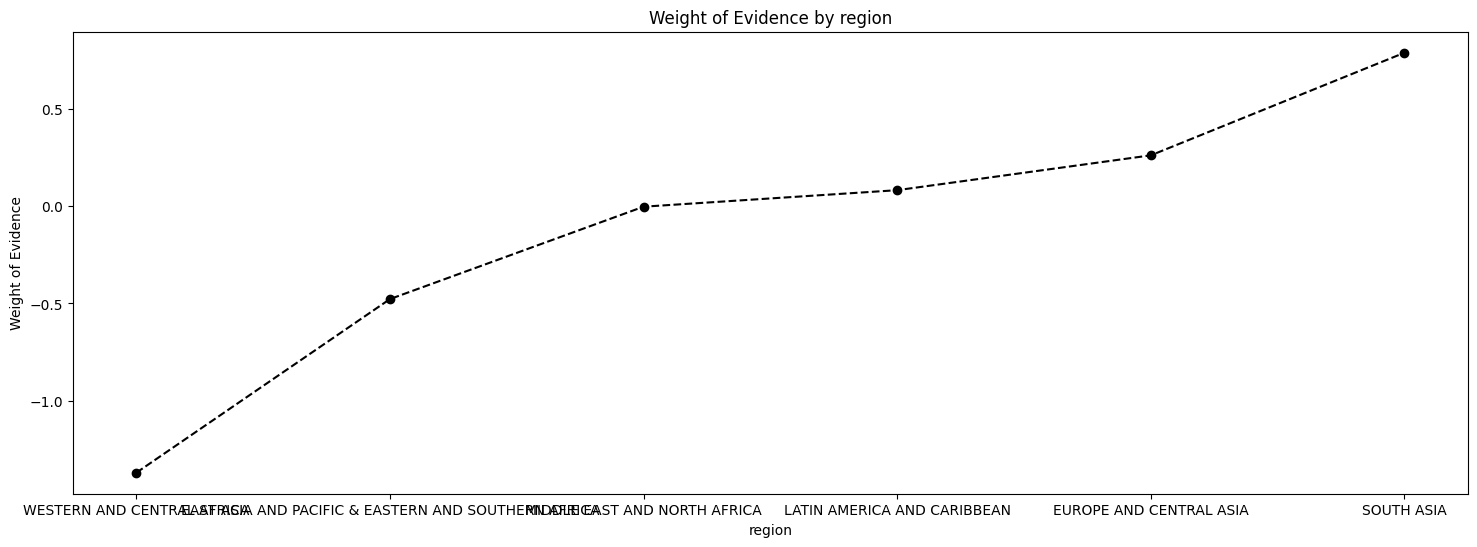

In [36]:
plot_by_woe(region_woe)

#### V.A.1.B. Country

In [37]:
country_woe = woe_analysis(X_train, "country", y_train)
country_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,Zimbabwe,2,0.000000,0.000427,0.0,2.0,0.000000,0.000448,-inf,NaN,NaN,inf
1,Iceland,8,0.000000,0.001709,0.0,8.0,0.000000,0.001791,-inf,0.000000,NaN,inf
2,Honduras,31,0.000000,0.006624,0.0,31.0,0.000000,0.006938,-inf,0.000000,NaN,inf
3,Haiti,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
4,Guyana,11,0.000000,0.002350,0.0,11.0,0.000000,0.002462,-inf,0.000000,NaN,inf
5,Senegal,14,0.000000,0.002991,0.0,14.0,0.000000,0.003133,-inf,0.000000,NaN,inf
6,Seychelles,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
7,Grenada,6,0.000000,0.001282,0.0,6.0,0.000000,0.001343,-inf,0.000000,NaN,inf
8,Greece,14,0.000000,0.002991,0.0,14.0,0.000000,0.003133,-inf,0.000000,NaN,inf
9,Ghana,7,0.000000,0.001496,0.0,7.0,0.000000,0.001567,-inf,0.000000,NaN,inf


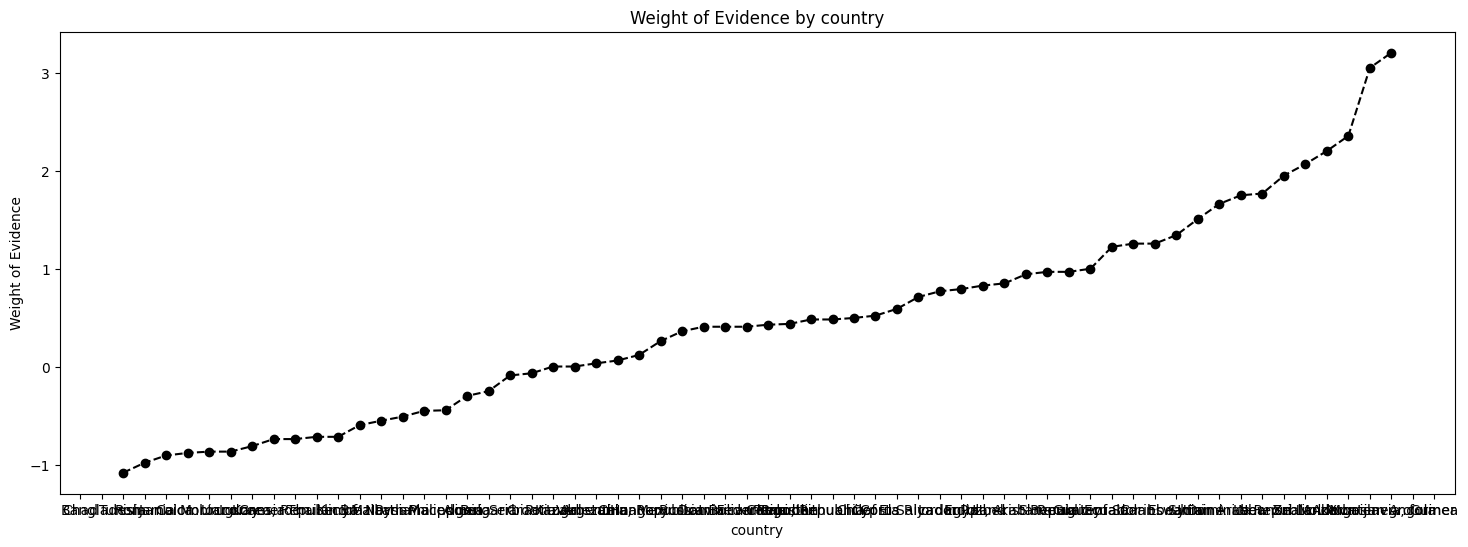

In [38]:
plot_by_woe(country_woe)

In [39]:
# def countries_binning(df):
#     group_A = ['Zimbabwe', 'Iceland', 'Honduras', 'Haiti', 'Guyana', 'Senegal',
#         'Seychelles', 'Grenada', 'Greece', 'Ghana', 'Gabon', 'France',
#         'Finland', 'Fiji', 'Ethiopia', 'Sierra Leone', 'Papua New Guinea',
#         'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Mauritius',
#         'Mauritania', 'Namibia', 'Malawi', 'Madagascar', 'Netherlands',
#         'Liberia', 'Myanmar', 'Lesotho', 'Nigeria', 'Zambia', 'Norway',
#         'Oman', 'Japan', 'Italy', 'Israel', 'Nicaragua', 'Singapore',
#         'Estonia', 'South Africa', 'Bahamas, The', 'Belarus', 'Belgium',
#         'Belize', 'Bolivia', 'Turkmenistan', 'Bosnia and Herzegovina',
#         'Botswana', 'Turkiye', 'Slovak Republic', 'Burundi', 'Austria',
#         'Australia', 'Trinidad and Tobago', 'Barbados', 'Armenia',
#         'Uganda', 'Tanzania', 'Western and Central Africa',
#         'Congo, Democratic Republic of', 'Taiwan, China',
#         'St. Vincent and the Grenadines', "Cote d'Ivoire", 'St. Lucia',
#         'St. Kitts and Nevis', 'Czechia', 'Denmark', 'Spain',
#         'Southern Africa', 'Eastern and Southern Africa', 'Chad',
#         'Bangladesh', 'Tunisia', 'Romania', 'Jamaica']
#     group_B = ['Colombia', 'Uruguay', 'Morocco']
#     group_C = ['Indonesia']
#     group_D = ['Cameroon', 'Korea, Republic of', 'Thailand', 'Kenya']
#     group_E = ['Brazil', 'Malaysia']
#     group_F = ['Panama', 'North Macedonia', 'Philippines', 'Algeria', 'Bulgaria',
#         'Serbia', 'Croatia']
#     group_G = ['Portugal', 'Kazakhstan', 'Argentina', 'China', 'Hungary']
#     group_H = ['Mexico']
#     group_I = ['Venezuela, Republica Bolivariana de', 'Latvia',
#         'Russian Federation', 'Dominican Republic', 'Peru', 'Pakistan',
#         'Congo, Republic of', 'Lithuania', 'Chile', 'Cyprus']
#     group_J = ['Costa Rica', 'El Salvador', 'Jordan', 'India', 'Poland',
#         'Uzbekistan', 'Egypt, Arab Republic of', 'Slovenia', 'Paraguay']
#     group_K = ['Guatemala', 'Ecuador', 'Sudan', 'Caribbean', 'Eswatini',
#         'Ukraine', 'Dominica', 'Syrian Arab Republic', 'Lebanon',
#         'New Zealand', 'Sri Lanka', 'Moldova', 'Azerbaijan', 'Montenegro',
#         'Yugoslavia, former', 'Angola', 'Guinea', 'Vietnam', 'Mozambique',
#         'Albania']
#     groups = [group_A, group_B, group_C, group_D, group_E, group_F, group_G, group_H, group_I, group_J, group_K]
#     group_names = ["group_a", "group_b", "group_c", "group_d", "group_e", "group_f", "group_g", "group_h", "group_i", "group_j", "group_k"]
#     country_group_dict = {}
#     for group, group_name in zip(groups, group_names):
#         for country in group:
#             country_group_dict[country] = group_name
#     all_countries = df["country"].unique()
#     for country in all_countries:
#         if country not in country_group_dict.keys():
#             country_group_dict[country] = "group_l"
#     df["country"] = df["country"].map(country_group_dict)
#     return df

In [42]:
def countries_binning(df):
    # Create a copy of the DataFrame to not overwrite the original data
    df_copy = df.copy()
    
    country_bin = {
        country: 'group_a' for country in ['Zimbabwe', 'Iceland', 'Honduras', 'Haiti', 'Guyana', 'Senegal',
        'Seychelles', 'Grenada', 'Greece', 'Ghana', 'Gabon', 'France',
        'Finland', 'Fiji', 'Ethiopia', 'Sierra Leone', 'Papua New Guinea',
        'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Mauritius',
        'Mauritania', 'Namibia', 'Malawi', 'Madagascar', 'Netherlands',
        'Liberia', 'Myanmar', 'Lesotho', 'Nigeria', 'Zambia', 'Norway',
        'Oman', 'Japan', 'Italy', 'Israel', 'Nicaragua', 'Singapore',
        'Estonia', 'South Africa', 'Bahamas, The', 'Belarus', 'Belgium',
        'Belize', 'Bolivia', 'Turkmenistan', 'Bosnia and Herzegovina',
        'Botswana', 'Turkiye', 'Slovak Republic', 'Burundi', 'Austria',
        'Australia', 'Trinidad and Tobago', 'Barbados', 'Armenia',
        'Uganda', 'Tanzania', 'Western and Central Africa',
        'Congo, Democratic Republic of', 'Taiwan, China',
        'St. Vincent and the Grenadines', "Cote d'Ivoire", 'St. Lucia',
        'St. Kitts and Nevis', 'Czechia', 'Denmark', 'Spain',
        'Southern Africa', 'Eastern and Southern Africa', 'Chad',
        'Bangladesh', 'Tunisia', 'Romania', 'Jamaica']
    }
    
    country_bin.update({country: 'group_b' for country in ['Colombia', 'Uruguay', 'Morocco']})
    country_bin.update({country: 'group_c' for country in ['Indonesia']})
    country_bin.update({country: 'group_d' for country in ['Cameroon', 'Korea, Republic of', 'Thailand', 'Kenya']})
    country_bin.update({country: 'group_e' for country in ['Brazil', 'Malaysia']})
    country_bin.update({country: 'group_f' for country in ['Panama', 'North Macedonia', 'Philippines', 'Algeria', 'Bulgaria',
        'Serbia', 'Croatia']})
    country_bin.update({country: 'group_g' for country in ['Portugal', 'Kazakhstan', 'Argentina', 'China', 'Hungary']})
    country_bin.update({country: 'group_h' for country in ['Mexico']})
    country_bin.update({country: 'group_i' for country in ['Venezuela, Republica Bolivariana de', 'Latvia',
        'Russian Federation', 'Dominican Republic', 'Peru', 'Pakistan',
        'Congo, Republic of', 'Lithuania', 'Chile', 'Cyprus']})
    country_bin.update({country: 'group_j' for country in ['Costa Rica', 'El Salvador', 'Jordan', 'India', 'Poland',
        'Uzbekistan', 'Egypt, Arab Republic of', 'Slovenia', 'Paraguay']})
    country_bin.update({country: 'group_k' for country in ['Guatemala', 'Ecuador', 'Sudan', 'Caribbean', 'Eswatini',
        'Ukraine', 'Dominica', 'Syrian Arab Republic', 'Lebanon',
        'New Zealand', 'Sri Lanka', 'Moldova', 'Azerbaijan', 'Montenegro',
        'Yugoslavia, former', 'Angola', 'Guinea', 'Vietnam', 'Mozambique',
        'Albania']})

    # Use apply function to replace the country names
    df_copy['country'] = df_copy['country'].apply(lambda x: country_bin.get(x, 'group_l'))
    
    return df_copy

In [43]:
X_train = countries_binning(X_train)
X_test = countries_binning(X_test)
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [44]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,group_j,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,group_h,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,group_f,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,group_a,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,group_e,Brazil,CPL,8.102367e+07


In [45]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
7270,LATIN AMERICA AND CARIBBEAN,group_i,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,group_i,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,group_k,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,group_f,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,group_e,Brazil,NPL,15000000.0


In [46]:
country_woe = woe_analysis(X_train, "country", y_train)
country_woe

,country,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,1177,0.003398,0.251496,4.0,1173.0,0.018868,0.262534,-2.632916,NaN,NaN,1.312413
1,group_b,359,0.019499,0.076709,7.0,352.0,0.033019,0.078782,-0.869611,0.016100,1.763304,1.312413
2,group_c,338,0.020710,0.072222,7.0,331.0,0.033019,0.074082,-0.808098,0.001211,0.061513,1.312413
3,group_d,267,0.022472,0.057051,6.0,261.0,0.028302,0.058415,-0.724651,0.001762,0.083447,1.312413
4,group_e,310,0.025806,0.066239,8.0,302.0,0.037736,0.067592,-0.582876,0.003335,0.141775,1.312413
5,group_f,450,0.033333,0.096154,15.0,435.0,0.070755,0.097359,-0.319186,0.007527,0.263690,1.312413
6,group_g,397,0.047859,0.084829,19.0,378.0,0.089623,0.084602,0.057655,0.014526,0.376841,1.312413
7,group_h,241,0.058091,0.051496,14.0,227.0,0.066038,0.050806,0.262217,0.010232,0.204563,1.312413
8,group_i,452,0.068584,0.096581,31.0,421.0,0.146226,0.094226,0.439464,0.010493,0.177247,1.312413
9,group_j,434,0.096774,0.092735,42.0,392.0,0.198113,0.087735,0.814518,0.028190,0.375053,1.312413


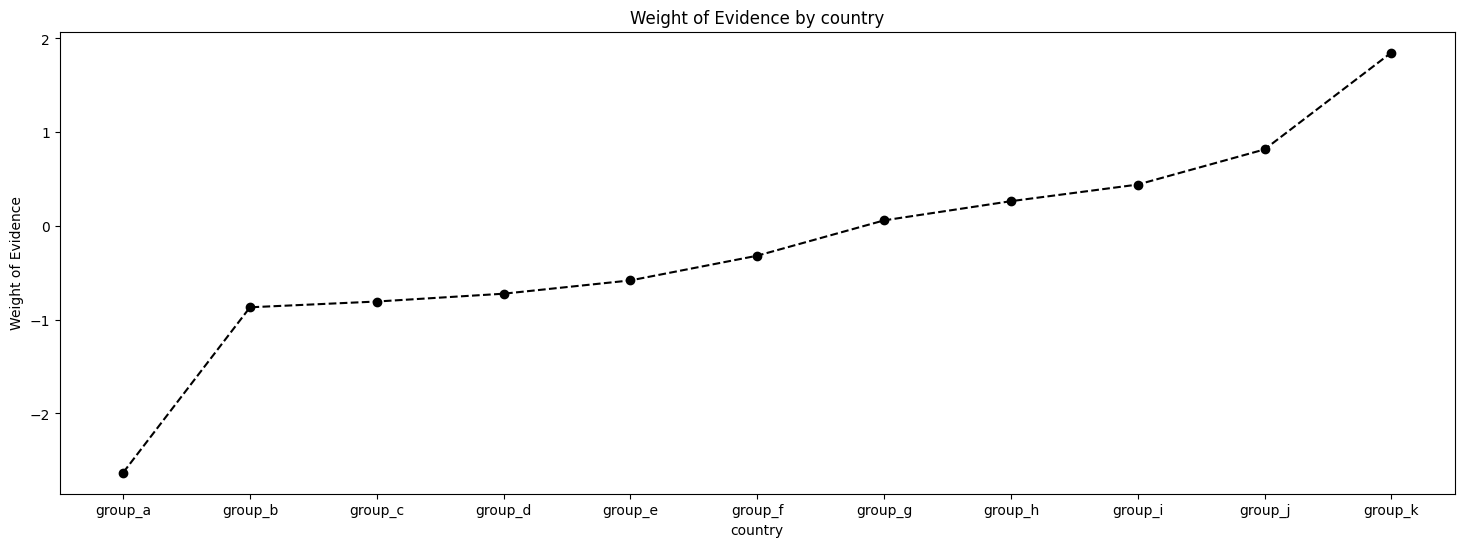

In [47]:
plot_by_woe(country_woe)

In [48]:
X_test.country.value_counts()

country
group_a    502
group_i    183
group_j    181
group_g    177
group_f    161
group_e    161
group_b    161
group_c    145
group_k    122
group_d    119
group_h     91
group_l      3
Name: count, dtype: int64

In [49]:
X_train.country.value_counts()

country
group_a    1177
group_i     452
group_f     450
group_j     434
group_g     397
group_b     359
group_c     338
group_e     310
group_d     267
group_k     255
group_h     241
Name: count, dtype: int64

#### V.A.1.D. Guarantor

In [ ]:
guarantor_woe = woe_analysis(X, "guarantor", y)
guarantor_woe

In [ ]:
plot_by_woe(guarantor_woe)

In [ ]:
def guarantor_binning(df):
    column_name = 'guarantor'
    group_A = ['Zambia', 'Ethiopia', 'Fiji', 'France', 'Gabon', 'Grenada', 'Trinidad and Tobago', 'Togo', 'Guyana', 'Slovak Republic', 'Honduras', 'Iran, Islamic Republic of', 'Iraq', 'Western and Central Africa', 'Tanzania', 'Estonia', 'Lesotho', 
               'Madagascar', 'Malawi', 'Mauritania', 'Mauritius', 'Taiwan, China', 'St. Vincent and the Grenadines', 'St. Lucia', 'Myanmar', 'Namibia', 'Nicaragua', 'Papua New Guinea', 'St. Kitts and Nevis', 'Seychelles', 'Sierra Leone', 'Liberia',
               'Turkmenistan', 'Haiti', 'United Kingdom', 'Armenia', 'Australia', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Uganda', 'Chad', 'South Africa', 'Congo, Democratic Republic of',
               "Cote d'Ivoire", 'Czechia', 'Turkiye', 'Tunisia']
    group_B = ['Nigeria', 'Jamaica', 'Cameroon', 'Korea, Republic of']
    group_C = ['Malaysia', 'Indonesia', 'Morocco', 'Romania']
    group_D = ['Colombia', 'Thailand', 'Bulgaria', 'Algeria']
    group_E = ['Philippines', 'Brazil']
    group_F = ['Croatia', 'Serbia', 'Hungary', 'Panama', 'Uruguay', 'Caribbean', 'Senegal', 'Argentina', 'Venezuela, Republica Bolivariana de']
    group_G = ['Mexico', 'Lithuania']
    group_H = ['China', 'Chile', 'Costa Rica']
    group_I = ['Russian Federation', 'Congo, Republic of', 'Kazakhstan', 'Kenya', 'North Macedonia', 'Peru', 'Poland', 'Pakistan', 'Jordan', 'Uzbekistan']
    group_J = ['Cyprus', 'Dominican Republic', 'Latvia', 'India', 'Guatemala', 'Ecuador', 'Ghana']
    group_K = ['Egypt, Arab Republic of', 'El Salvador', 'Slovenia', 'Sudan', 'Eswatini', 'Paraguay', 'Montenegro', 'Ukraine', 'Dominica', 'Syrian Arab Republic', 'Sri Lanka', 'Lebanon', 'Moldova', 'Azerbaijan', 'Guinea', 'Mozambique', 'Angola',
               'Vietnam', 'Albania']
    groups = [group_A, group_B, group_C, group_D, group_E, group_F, group_G, group_H, group_I, group_J, group_K]
    group_names = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e', 'group_f', 'group_g', 'group_h', 'group_i', 'group_j', 'group_k']

    guarantor_group_dict = {}
    for group, group_name in zip(groups, group_names):
        for guarantor in group:
            guarantor_group_dict[guarantor] = group_name

    all_guarantors = df[column_name].unique()
    for guarantor in all_guarantors:
        if pd.isna(guarantor):
            guarantor_group_dict[guarantor] = 'group_m'
        elif guarantor not in guarantor_group_dict.keys():
            guarantor_group_dict[guarantor] = 'group_l'

    df[column_name] = df[column_name].map(guarantor_group_dict)
    return df

In [ ]:
X = guarantor_binning(X)
X.shape

In [ ]:
X.head()

In [ ]:
guarantor_woe = woe_analysis(X, "guarantor", y)
guarantor_woe

In [ ]:
plot_by_woe(guarantor_woe)

#### V.A.1.E. Loan Type

In [ ]:
loan_type_woe = woe_analysis(X, "loan_type", y)
loan_type_woe

In [ ]:
plot_by_woe(loan_type_woe)

#### V.E.1.G. Principal Amount

In [ ]:
X["principal_amount_binned"] = pd.cut(X["principal_amount"], 5)
principal_amount_woe = woe_analysis(X, "principal_amount", y)
principal_amount_woe

In [ ]:
plot_by_woe(principal_amount_woe)

#### V.E.1.H. Country - Guarantor Relationship Status

In [ ]:
country_guarantor_status_woe = woe_analysis(X, "country_guarantor_relationship_status", y)
country_guarantor_status_woe

In [ ]:
plot_by_woe(country_guarantor_status_woe)

## V.B. Feature Binning One-Hot Encoding

### V.B.1. Categorical Feature Dummy Encoding

In [ ]:
def dummy_encoding(df, columns_list):
    df_dummies = pd.get_dummies(df[columns_list], prefix = columns_list, prefix_sep = ":")
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [ ]:
X_train = dummy_encoding(X_train, ["column_0", "column_1"])
X_test = dummy_encoding(X_test, ["column_0", "column_1"])
X_train.shape, X_test.shape

In [ ]:
X_train.head()

In [ ]:
X_test.head()

### V.B.2. Overall Feature One-Hot Encoding

In [ ]:
def manual_binning_ohe_encoding(X):
    X_encoded = X.copy()
    original_columns = X.columns.tolist()
    # Categorical Features
    X_encoded["feature_0:bin_0"] = X.loc[:, "encodedfeature_0:bin_0"]
    X_encoded["feature_0:bin_1"] = X.loc[:, "feature_0:bin_1"]
    # Numerical Features
    X_encoded["feature_1:36"] = np.where((X["feature_1"] == 36), 1, 0) # Change this according to your data
    X_encoded["feature_1:60"] = np.where((X["feature_1"] == 60), 1, 0) # Change this according to your data
    # Continuous Features
    X_encoded["feature_2:<7.071"] = np.where((X["feature_2"] <= 7.071), 1, 0) # Change this according to your data
    X_encoded["feature_2:7.071-10.374"] = np.where((X["feature_2"] > 7.071) & (X["feature_2"] <= 10.374), 1, 0) # Change this according to your data
    X_encoded.drop(columns = original_columns, inplace = True)
    return X_encoded

In [ ]:
X_train_ohe = manual_binning_ohe_encoding(X_train)
X_test_ohe = manual_binning_ohe_encoding(X_test)
X_train_ohe.shape, X_test_ohe.shape

In [ ]:
X_train_ohe.head()

In [ ]:
X_test_ohe.head()

## V.C. Export Data

In [ ]:
X_train_ohe.to_pickle('../../data/processed/X_train_ohe.pkl')
X_test_ohe.to_pickle('../../data/processed/X_test_ohe.pkl')